# Data Exploration

Creating our data set was an important step for our project. Since we now have the data saved in a external _csv_ file, we can start getting familiar with the dataset. We can explore what are the News sources report about Taiwan elections, and which dates are the news about Taiwan elections appeared in the English newspapers. In order to do so, we need to import three main packages for data analysis,  __```Numpy, Pandas and Matplotlib```__.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

Now we will read our dataset into a pandas dataframe object and read the first five rows of the dataset.

In [2]:
tw_news = pd.read_csv('tw_dataset.csv', date_parser='date')

tw_news = tw_news.sort_values(by='date')
tw_news.head()

,source,date,URL,title,fulltext,description
5,Reuters,04-November-2019,https://www.reuters.com/article/us-china-taiwa...,"China offers more access for Taiwan firms, Tai...",3 Min ReadBEIJING/TAIPEI (Reuters) - China unv...,China unveiled measures on Monday to further o...
13,Reuters,05-November-2019,https://www.reuters.com/article/us-china-taiwa...,China says will 'fully respect' Taiwan's way o...,3 Min ReadBEIJING/TAIPEI (Reuters) - China wil...,"China will ""fully respect"" Taiwan's way of lif..."
12,Reuters,07-November-2019,https://www.reuters.com/article/us-taiwan-dipl...,Taiwan warns of possible attack if China's slo...,5 Min ReadTAIPEI (Reuters) - Beijing could res...,Beijing could resort to military conflict with...
3,Reuters,13-November-2019,https://www.reuters.com/article/us-china-taiwa...,China says Taiwan scaremongering with attack talk,3 Min ReadBEIJING (Reuters) - China said on We...,China said on Wednesday Taiwan was scaremonger...
7,Telegraph.co.uk,18-November-2019,https://www.telegraph.co.uk/news/2019/11/18/ta...,Taiwan accuses China of intimidation ahead of ...,Taiwan has accused China of attempting to inti...,Taiwan has accused China of attempting to inti...


In [3]:
print ('There are {} observations and {} columns in this dataset.'.format(tw_news.shape[0], tw_news.shape[1]))

There are 20 observations and 6 columns in this dataset.


Pandas has powerful tools for exploring and sorting the data. For instance, it can easily provide the count of values by index, or positional index without needing to group the values by column. By using such a property we can get the values to understand distribution of articles per date and source, and then visualise it with a bar chart and pie chart respectively. Exploring and visualising such a data can help to under the variety of sources feeding the news about the Taiwan elections, and also what incidents prompted more news about Taiwan election to appear in the English written media.

In [4]:
sources = tw_news['source'].value_counts().sort_index()
dates =tw_news['date'].value_counts().sort_index()


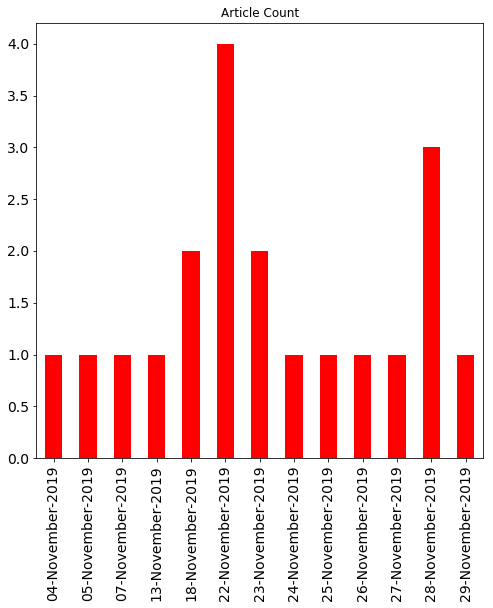

In [5]:
dates.plot(kind='bar',  color='red', title='Article Count', figsize=(8,8), fontsize=14)
plt.show()

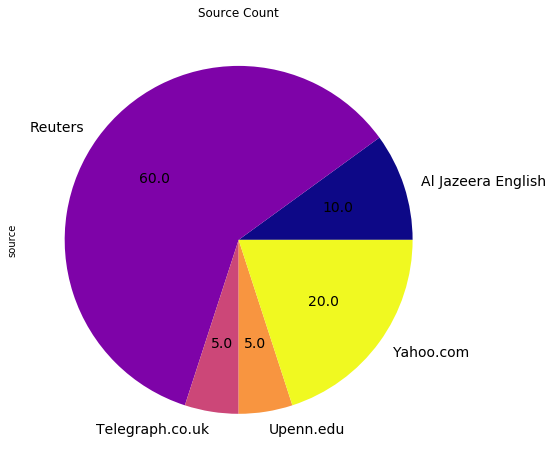

In [6]:
sources.plot(kind='pie', colormap='plasma', title = 'Source Count', autopct ='%.1f',figsize=(8,8), fontsize=14)
plt.show()

As a preliminary analysis, we can create a Word Cloud of the articles in our dataset in order to visually distill words according to their frequency. It is a simple but useful introduction for the Natural Language Processing. We need to import __wordcloud__ and __ nltk__ modules for this task.

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords


We also need to create a function that will concenate all the articles into a string object.

In [8]:
def sum_text(dataset):
    '''
    takes pd dataset returns connotated text
    '''
    sumoftxt = ''
    for i in dataset['fulltext']:
        sumoftxt += i
    return sumoftxt

text = sum_text(tw_news)

In order to create an efficient visualization, we need to create a set of stopwords which includes the most commonly used words, such as 'I', 'and',etc., in the English language. By doing so, we make sure that our wordcloud would not be populated by these common words.

In [16]:


stopwd= STOPWORDS

stopwd.update(set(stopwords.words('english')))
stopwd.update({'Taiwan','Chinese','said','told', 'Taiwanese'})


Now we are ready for visulazing our wordcloud with the specific parametres we would like to use. 

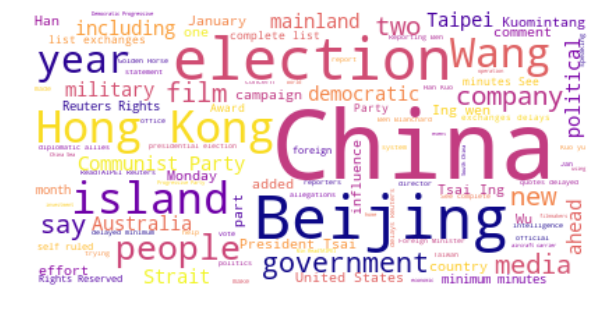

In [10]:
tw_cloud = WordCloud(stopwords= stopwd, background_color='white', max_words=100, colormap='plasma' ).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(tw_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

Although, this Wordcloud is pretty impressive, we can do masking, to shape the wordcloud for aestethic reasons as we wish. We will now try to shape it as the map of Taiwan.

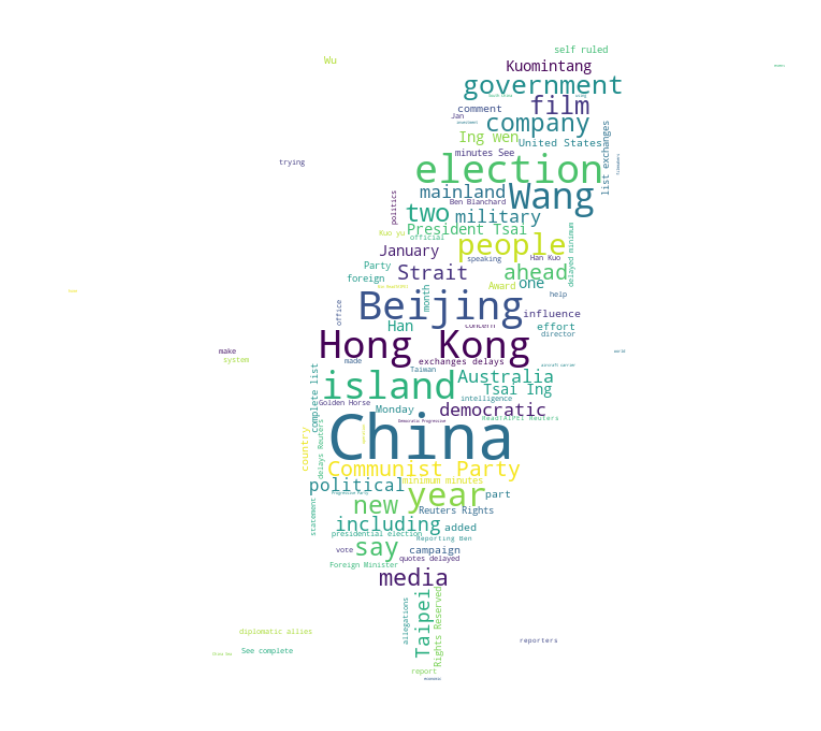

In [17]:
import numpy as np
from PIL import Image
tw_map = np.array(Image.open('images/tw_map2.jpg'))

tw_cloud = WordCloud(stopwords= stopwd, background_color='white', max_words=100, mask=tw_map ).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(tw_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

We can now save the generated wordcloud into an image file so that we can access and use it later as well. We will save this one to a file called __tw_cloud.png__ in our working directory.

In [14]:
tw_cloud.to_file('tw_cloud.png')

_After completing the preliminary analysis and visualisation of the dataset, we are now ready for the analysis and __keyword extraction.___

- __[Previous: Finding the Data]( 1 - Finding the Data.ipynb)__
- __[Next: Data Analysis - Keyword Extraction](3 - Data Analysis.ipynb)__